In [43]:
import pandas as pd

data = pd.read_csv("../raw_data/training.processed.noemoticon.csv",encoding='latin-1', engine="python",error_bad_lines=False)
data.head()

/Users/joacosoulez/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [44]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "usuario", "Tweet"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,usuario,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
data.target.unique()

array([0, 4])

In [45]:
data = data[data['target'] == 4]

In [46]:
data['label'] = 0
data = data[["target", "ids", "date", "flag", "usuario", "Tweet", 'label']]
data.head()

,target,ids,date,flag,usuario,Tweet,label
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,0
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,0
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,0
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,0


In [47]:
col_names = ['ids', 'Tweet']
depressive_tweets_df = pd.read_csv("../raw_data/depressive_tweets_processed.csv", sep = '|', header = None, usecols = [0,5], nrows = 3200, names=col_names)
depressive_tweets_df

,ids,Tweet
0,989292962323615744,The lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...
...,...,...
2340,989036568781389830,Many sufferers of depression aren't sad; they ...
2341,989036542898397185,No Depression by G Herbo is my mood from now o...
2342,989036488162766848,What do you do when depression succumbs the br...
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...


In [48]:
depressive_tweets_df['label'] = 1
depressive_tweets_df = depressive_tweets_df[['Tweet', 'label', 'ids']]

In [49]:
df = pd.concat([data,depressive_tweets_df])
#df = df.sample(frac=1) # los mezclo
df.head()

,target,ids,date,flag,usuario,Tweet,label
799999,4.0,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,0
800000,4.0,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,0
800001,4.0,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
800002,4.0,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,0
800003,4.0,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,0


In [9]:
df['label'].unique()

array([0, 1])

In [50]:
df = df[['ids','Tweet','label']]

In [11]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

In [12]:
def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [13]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joacosoulez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('https')
stopwords.append('com')
stopwords.append('http')
stopwords.append('twitter')
stopwords.append('m')
stopwords.append('www')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def remove_numbers(tweet):
    words_only = ''.join([i for i in tweet if not i.isdigit()])
    return words_only

In [28]:
import nltk
nltk.download('words')
from nltk.corpus import words

def remove_consec_duplicat(s):
    new_s = ""
    prev = ""
    diccionary = words.words()
    for word in s:
        if word in diccionary == False:
            for c in s:
                if len(new_s) == 0:
                    new_s += c
                    prev = c
                if c == prev:
                    continue
                else:
                    new_s += c
                    prev = c
            return new_s
        else:
            continue
    return s

[nltk_data] Downloading package words to
[nltk_data]     /Users/joacosoulez/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [63]:
df2 = df2.dropna()

In [64]:
df2['Tweet'].isna().sum()

0

In [65]:
df2[df2['Tweet'].str.contains("pic")]

,ids,Tweet,label
800016,1467822924,@nicolerichie: your picture is very sweet,0
800020,1467823016,Going to bed so goodnight everyone and sweet ...,0
800054,1467824600,#Devunity Wallpaper Check this out ! --&gt;...,0
800056,1467824647,uploading pictures on friendster,0
800057,1467824699,@ash_CT Aw dont you love that I love for thos...,0
...,...,...,...
2304,989037307314475008,All the #diet and #exercise #plans aren't #wor...,1
2316,989037086362820609,sometimes i don't fit in with my friends and i...,1
2327,989036830866669570,I love Lauren so much <Emoji: Loudly crying fa...,1
2337,989036637094055937,RT Depression Could Be Improved With Vitamin D...,1


In [67]:
df2['Tweet'][800054]

'#Devunity Wallpaper  Check this out !   --&gt;    http://twitpic.com/2y2e2'

In [113]:
!pip install tweet-preprocessor
#!python3 -m nltk.downloader stopwords
!pip install nltk
from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemmer
import preprocessor as p
import itertools
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
emoticons = emoticons_happy.union(emoticons_sad)

lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer()


BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = p.clean(tweet)
        tweet = emoji_pattern.sub(r'', tweet)
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = remove_consec_duplicat(tweet)
        tweet = expandContractions(tweet)
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
        tweet = remove_numbers(tweet)
        stop_words = set(stopwords)
        word_tokens = nltk.word_tokenize(tweet) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        tweet = ''.join([lemmatizer.lemmatize(w) for w in tweet])
        
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

In [51]:
df2 = df.copy()

In [114]:
X = clean_tweets([tweet for tweet in [df2['Tweet'][1]]])
X

['told parents depresion hard get gen x people understand something control al time cure walk keping mind busy']

In [115]:
X = clean_tweets([tweet for tweet in df2['Tweet']])
df2['Tweet'] = X

In [116]:
df2.head()

,ids,Tweet,label
799999,1467822272,love u guys r best,0
800000,1467822273,im meting one besties tonight cant wait girl talk,0
800001,1467822283,thanks twiter ad sunisa got met hin show dc ar...,0
800002,1467822287,sick realy cheap hurts much eat real fod plus ...,0
800003,1467822293,efect everyone,0


In [20]:
X = df2[df2['label'] == 1]
Y = df2[df2['label'] == 0]

In [21]:
!pip install wordcloud
from wordcloud import WordCloud


In [22]:
depressive_words = ' '.join(list(map(str, X['Tweet'])))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

In [23]:
not_depressive_words = ' '.join(list(map(str, Y['Tweet'])))
not_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(not_depressive_words)

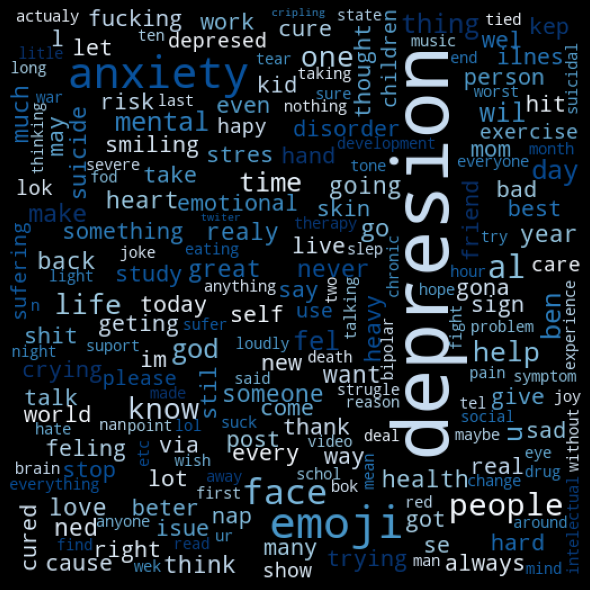

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

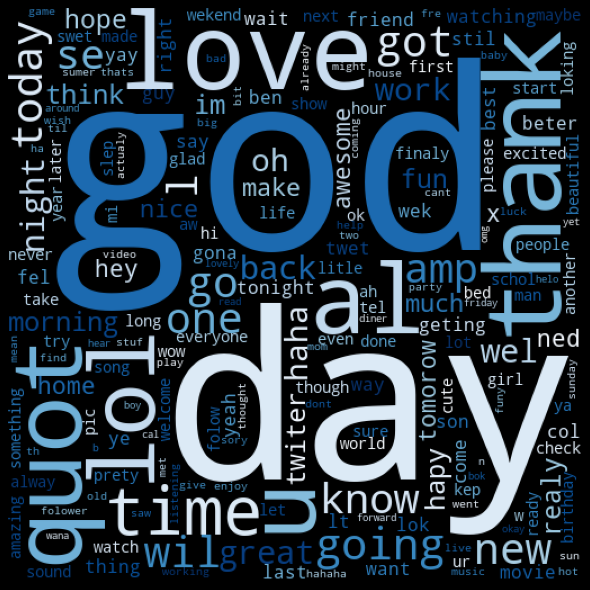

In [25]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Text(0.5, 1.0, 'Dataset labels distribuition')

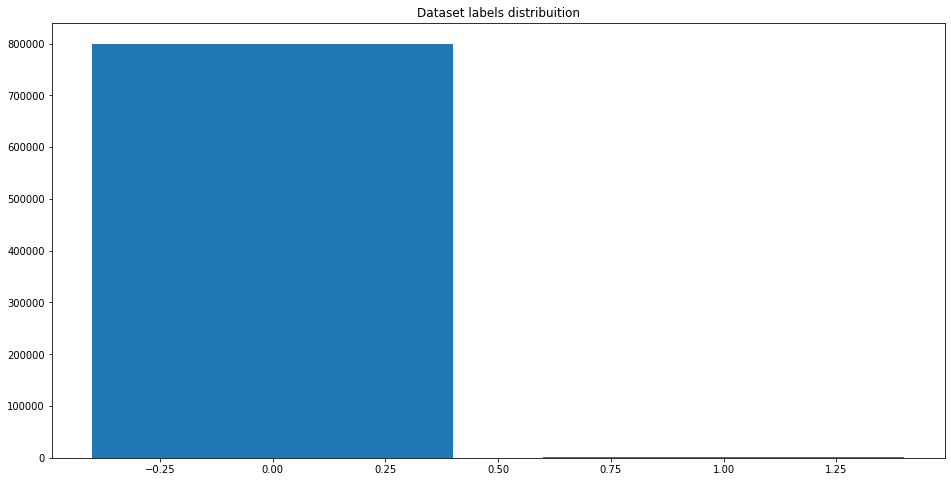

In [26]:
from collections import Counter
label_cnt = Counter(df.label)

plt.figure(figsize=(16,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset labels distribuition")

In [27]:
X['Tweet'].shape, Y['Tweet'].shape

((2345,), (800000,))

In [28]:
import collections 
all_Y_words = []
for line in list(Y['Tweet']):
    words = line.split()
    for word in words:
        all_Y_words.append(word.lower())
    
    
collections.Counter(all_Y_words).most_common(10)

[('god', 68585),
 ('love', 49057),
 ('day', 48520),
 ('al', 42123),
 ('quot', 41918),
 ('like', 37576),
 ('lol', 36586),
 ('get', 36568),
 ('thanks', 34803),
 ('u', 32134)]

In [29]:
all_X_words = []
for line in list(X['Tweet']):
    words = line.split()
    for word in words:
        all_X_words.append(word.lower())
    
    
collections.Counter(all_X_words).most_common(10)

[('depresion', 2209),
 ('emoji', 367),
 ('anxiety', 340),
 ('face', 215),
 ('like', 202),
 ('al', 172),
 ('people', 166),
 ('know', 133),
 ('life', 123),
 ('one', 122)]

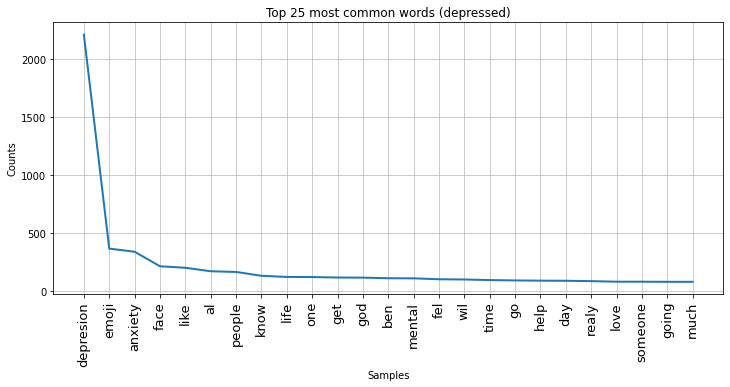

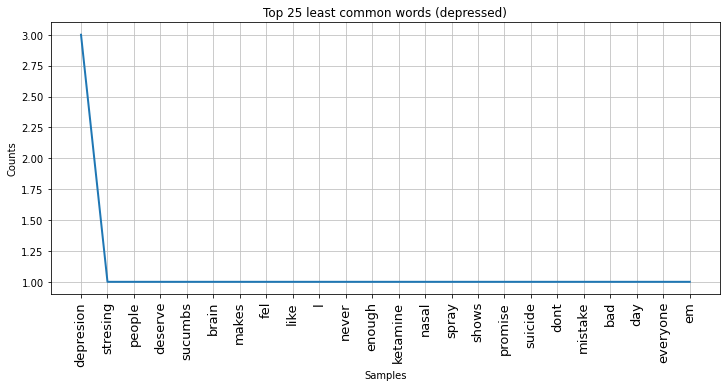

<AxesSubplot:title={'center':'Top 25 least common words (depressed)'}, xlabel='Samples', ylabel='Counts'>

In [30]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_words[-26:])
fd.plot(cumulative=False)

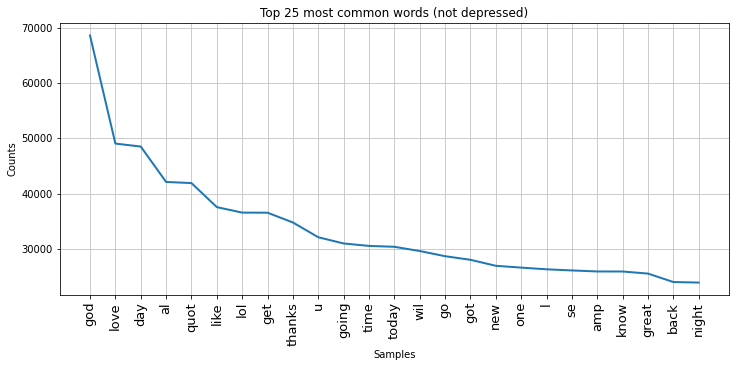

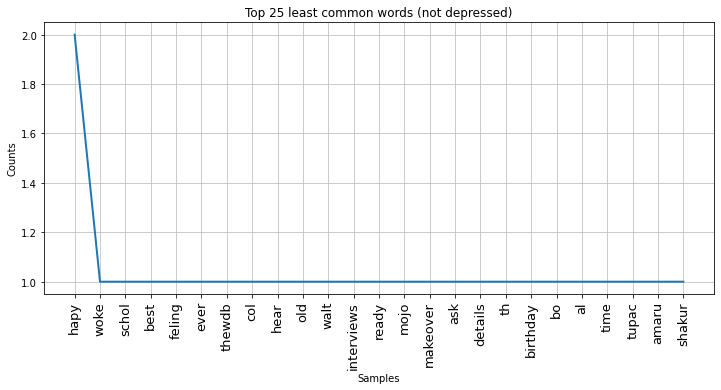

<AxesSubplot:title={'center':'Top 25 least common words (not depressed)'}, xlabel='Samples', ylabel='Counts'>

In [31]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (not depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_Y_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words (not depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_Y_words[-26:])
fd.plot(cumulative=False)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802345 entries, 799999 to 2344
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ids     802345 non-null  object
 1   Tweet   802345 non-null  object
 2   label   802345 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.5+ MB


In [33]:
df2.isnull().sum().sort_values(ascending=False)/len(df)

ids      0.0
Tweet    0.0
label    0.0
dtype: float64

In [34]:
df2

,ids,Tweet,label
799999,1467822272,love u guys r best,0
800000,1467822273,im meting one besties tonight cant wait girl talk,0
800001,1467822283,thanks twiter ad sunisa got met hin show dc ar...,0
800002,1467822287,sick realy cheap hurts much eat real fod plus ...,0
800003,1467822293,efect everyone,0
...,...,...,...
2340,989036568781389830,many suferers depresion sad fel nothing al per...,1
2341,989036542898397185,depresion g herbo mod done stresing people des...,1
2342,989036488162766848,depresion sucumbs brain makes fel like l never...,1
2343,989036488158572544,ketamine nasal spray shows promise depresion s...,1


In [35]:
df2[['Tweet']]

,Tweet
799999,love u guys r best
800000,im meting one besties tonight cant wait girl talk
800001,thanks twiter ad sunisa got met hin show dc ar...
800002,sick realy cheap hurts much eat real fod plus ...
800003,efect everyone
...,...
2340,many suferers depresion sad fel nothing al per...
2341,depresion g herbo mod done stresing people des...
2342,depresion sucumbs brain makes fel like l never...
2343,ketamine nasal spray shows promise depresion s...


In [36]:
df2 = df2.reset_index(drop=True)

In [37]:
sum(["http" in tweet for tweet in df2['Tweet']])

0

In [38]:
contain_http = pd.Series(["http" in tweet for tweet in df2['Tweet']])

df2[contain_http]

,ids,Tweet,label


In [39]:
y = Y['Tweet'].sample(n = 2345)


In [40]:
y.shape

(2345,)

In [41]:
X['Tweet']

0       lack understanding smal significant part cause...
1       told parents depresion hard get gen x people u...
2       depresion something speak even going also doub...
3       made tortila filed pb j depresion cured olivia...
4       gona ned depresion meds son rainouts spining e...
                              ...                        
2340    many suferers depresion sad fel nothing al per...
2341    depresion g herbo mod done stresing people des...
2342    depresion sucumbs brain makes fel like l never...
2343    ketamine nasal spray shows promise depresion s...
2344           dont mistake bad day depresion everyone em
Name: Tweet, Length: 2345, dtype: object

In [42]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC

# vectorizer = TfidfVectorizer()

# X = vectorizer.fit_transform(X['Tweet'])

# y = y

# model = SVC()

# model.fit(X,y)

# model.score(X,y)

In [43]:
prueba = pd.read_csv("../raw_data/depressive_tweets.csv")

In [44]:
prueba.shape

(24147, 7)

In [45]:
prueba.head()

,Unnamed: 0,tweet.id,created_at,text,location,retweet,favorite
0,0,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
1,1,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0
2,2,1447807717859491842,2021-10-12 06:13:53,I feel a little hopeless. Anyone else? #hopele...,NaN,0,0
3,3,1448076026219692033,2021-10-13 00:00:03,"Which is more healthy? Hope, or hopelessness? ...","Denver, CO",0,0
4,4,1448382047375040513,2021-10-13 20:16:04,So someone tell me how do I get over #HOPELESS...,Portland Or .,0,2


In [46]:
prueba['ids'] = prueba['tweet.id']
prueba['Tweet'] = prueba['text']
prueba['label'] = 1
prueba = prueba[['ids','Tweet','label']]

In [47]:
prueba.isnull().sum().sort_values(ascending=False)/len(prueba)

ids      0.0
Tweet    0.0
label    0.0
dtype: float64

In [48]:
df3 = pd.concat([df2, prueba])
df3.shape

(826492, 3)

In [49]:
df3.isnull().sum().sort_values(ascending=False)/len(df3)

ids      0.0
Tweet    0.0
label    0.0
dtype: float64

In [50]:
df2.isnull().sum().sort_values(ascending=False)

ids      0
Tweet    0
label    0
dtype: int64

In [117]:
df2.to_csv('df_limpio.csv')

In [52]:
X2 = clean_tweets([tweet for tweet in df3['Tweet']])
df3['Tweet'] = X2
df3.head()

,ids,Tweet,label
0,1467822272,love u guys r best,0
1,1467822273,im meting one besties tonight cant wait girl talk,0
2,1467822283,thanks twiter ad sunisa got met hin show dc ar...,0
3,1467822287,sick realy cheap hurts much eat real fod plus ...,0
4,1467822293,efect everyone,0


In [53]:
df3_bis = df3.copy()

In [54]:
df3_bis.shape

(826492, 3)

In [55]:
df3.isnull().sum().sort_values(ascending=False)

ids      0
Tweet    0
label    0
dtype: int64

In [56]:
sum(["http" in tweet for tweet in df3['Tweet']])

0

In [68]:
df3.to_csv('df_limpio_con_df_lunes_limpio.csv', index = False)

In [58]:
X_nueva = df3_bis[df3_bis['label'] == 1]
Y_nueva = df3_bis[df3_bis['label'] == 0]

In [59]:
import collections 

all_X_nueva_words = []
for line in list(X_nueva['Tweet']):
    words = line.split()
    for word in words:
        all_X_nueva_words.append(word.lower())
    
    
collections.Counter(all_X_nueva_words).most_common(10)

[('depresion', 3468),
 ('like', 2595),
 ('al', 2391),
 ('people', 2152),
 ('amp', 2081),
 ('one', 2075),
 ('fel', 2029),
 ('anxiety', 1901),
 ('get', 1854),
 ('life', 1793)]

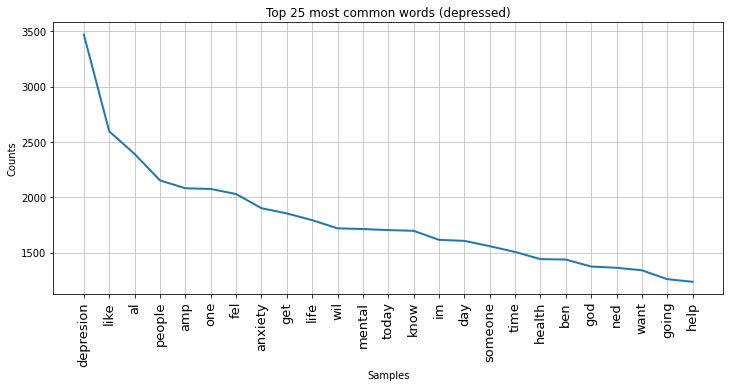

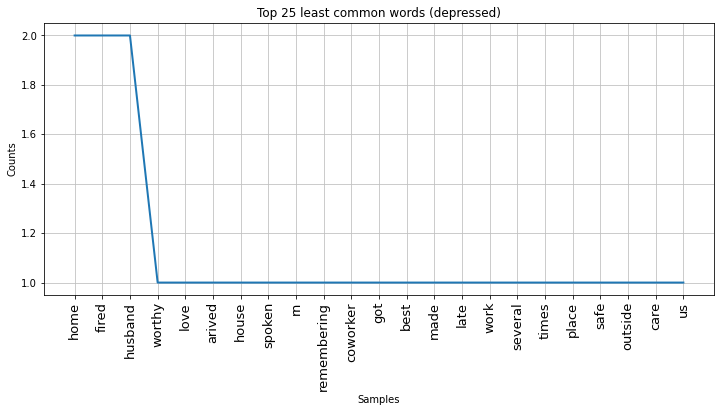

<AxesSubplot:title={'center':'Top 25 least common words (depressed)'}, xlabel='Samples', ylabel='Counts'>

In [60]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_nueva_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_nueva_words[-26:])
fd.plot(cumulative=False)

In [61]:
y_nueva = Y_nueva['Tweet'].sample(n = 26492)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(X_nueva['Tweet'])

y = y_nueva

In [63]:
# nb_model = MultinomialNB()

# nb_model.fit(X,y)

# nb_model.score(X,y)


In [64]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.6)

X = tf_idf_vectorizer.fit_transform(X_nueva['Tweet'])

X.toarray()

pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())


/Users/joacosoulez/.pyenv/versions/3.8.12/envs/MHFA/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,aba,abandon,abandoned,abandoning,abandonment,abandons,abate,abatement,abc,...,zones,zoning,zopiclone,zora,zoster,zros,zu,zuckerberg,zvqwnmgldjxnvpghknftrwjnas,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tf_idf_vectorizer = TfidfVectorizer(min_df = 0.05)

X = tf_idf_vectorizer.fit_transform(X_nueva['Tweet'])

X.toarray()

pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

/Users/joacosoulez/.pyenv/versions/3.8.12/envs/MHFA/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,al,amp,anxiety,ben,day,depresion,fel,get,im,know,life,like,mental,one,people,someone,time,today,wil
0,0.000000,0.0,0.613816,0.0,0.0,0.507677,0.604561,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.435393,0.0,0.000000,0.0,0.0,0.384625,0.000000,0.465761,0.0,0.0,0.0,0.00000,0.0,0.000000,0.451906,0.0,0.491268,0.0,0.0
2,0.405235,0.0,0.000000,0.0,0.0,0.357983,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.841209,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26487,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
26488,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
26489,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.69006,0.0,0.723752,0.000000,0.0,0.000000,0.0,0.0
26490,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [66]:
tf_idf_vectorizer = TfidfVectorizer(max_features = 2)

X = tf_idf_vectorizer.fit_transform(X_nueva['Tweet'])

X.toarray()

pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

/Users/joacosoulez/.pyenv/versions/3.8.12/envs/MHFA/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,depresion,like
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
26487,0.0,0.0
26488,0.0,0.0
26489,0.0,1.0
26490,0.0,0.0


In [129]:
prueba2 = pd.read_csv('../raw_data/df_limpio.csv')
prueba2.shape

/var/folders/bj/ndgdqzgj6qgd9y613qph_m180000gn/T/ipykernel_50203/3308995765.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  prueba2 = pd.read_csv('../raw_data/df_limpio.csv')


(802345, 4)

In [132]:
prueba2['Tweet'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 802345 entries, 0 to 802344
Series name: Tweet
Non-Null Count   Dtype 
--------------   ----- 
797876 non-null  object
dtypes: object(1)
memory usage: 6.1+ MB


In [78]:
df2.shape

(802345, 3)

In [71]:
df3.shape

(826492, 3)

In [73]:
prueba3 = pd.read_csv('df_limpio_con_df_lunes_limpio.csv')
prueba3.shape

/var/folders/bj/ndgdqzgj6qgd9y613qph_m180000gn/T/ipykernel_50203/442516275.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  prueba3 = pd.read_csv('df_limpio_con_df_lunes_limpio.csv')


(826492, 3)

In [135]:
df2.isna().sum().sort_values(ascending=False)

ids      0
Tweet    0
label    0
dtype: int64

In [134]:
prueba2.isna().sum().sort_values(ascending=False)

Tweet         4469
Unnamed: 0       0
ids              0
label            0
dtype: int64

In [125]:
prueba2_df = prueba2[prueba2['label'] == 1]
prueba2_df.isnull().sum().sort_values(ascending=False)/len(prueba2_df)

Tweet         0.015778
Unnamed: 0    0.000000
ids           0.000000
label         0.000000
dtype: float64

In [83]:
prueba3.isnull().sum().sort_values(ascending=False)

Tweet    4501
ids         0
label       0
dtype: int64

In [111]:
def remove_consecutive_duplicates(text):
    new_s = ""
    prev = ""
    for c in text:
        if len(new_s) == 0:
            new_s += c
            prev = c
        if c == prev:
            continue
        else:
            new_s += c
            prev = c
    return new_s

#     english_words = words.words()
    
#     word_tokens = nltk.word_tokenize(text)
    
#     word_tokens_edited = [rcd(w) if not w.lower() in english_words else w for w in word_tokens ]
    
#    return ' '.join(word_tokens_edited)

In [112]:
text = 'hellooooo'
remove_consecutive_duplicates(text)

'helo'